In [2]:

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 3.7 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'manrega data' 

In [7]:
os.chdir('/content/drive/MyDrive/METADATA_22/ML/image_classification')

In [8]:
!ls

 chair_2			     model_new.pkl
'image classifier.pkl'		     model.png
 image_classifier.pkl		     models
'manrega data'			    'Testing images'
'manrega logs'			     training_chair
 model_chair.pkl		     training_chair_logs
 model_new_imageclassifier0524.pkl


In [9]:
os.listdir(data_dir)

['road', 'field', 'pond', 'shelter', 'building', 'canal', 'dam']

In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('manrega data')
# this command is used for inferred labeling  

Found 693 files belonging to 7 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

In [16]:
 batch[0].shape
 #images being represented as numpy array

(32, 256, 256, 3)

In [17]:
data_iterator

In [18]:
len(batch)
# length of the batch comes 2 as there are two parts of the batch one is images and other is labeels at indices 0 and 1 repectively

2

In [19]:
batch[1]

array([5, 3, 1, 0, 3, 0, 3, 4, 4, 5, 6, 5, 0, 3, 5, 1, 1, 6, 0, 2, 0, 4,
       1, 5, 5, 5, 4, 3, 1, 6, 0, 1], dtype=int32)

In [20]:

data = data.map(lambda x,y: (x/255, y))

In [21]:
scalled_iterator=data.as_numpy_iterator()

In [22]:
batch=scalled_iterator.next()

In [23]:
batch[0].max()

1.0

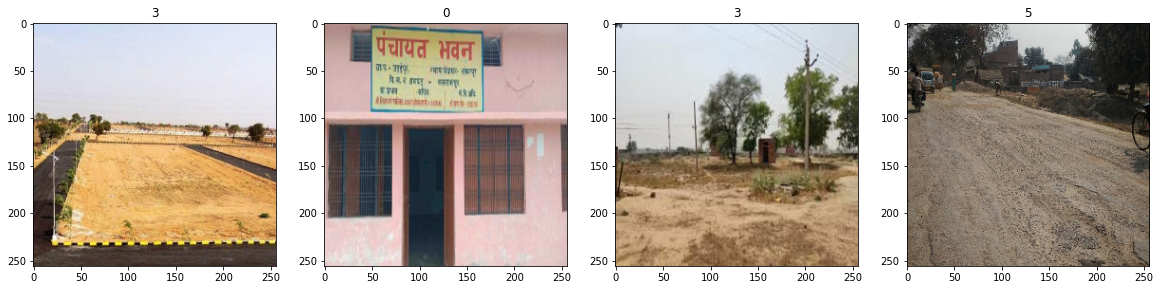

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [25]:
len(data)

22

In [26]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [27]:
test_size+val_size+train_size

22

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [32]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [34]:
logdir='manrega logs'


In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [36]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])
#set it 10

Epoch 1/10
16/16 [==============================] - 47s 3s/step - loss: 2.5322 - accuracy: 0.1602 - val_loss: 1.9210 - val_accuracy: 0.2031
Epoch 2/10
16/16 [==============================] - 45s 3s/step - loss: 1.8705 - accuracy: 0.2480 - val_loss: 1.6991 - val_accuracy: 0.3438
Epoch 3/10
16/16 [==============================] - 46s 3s/step - loss: 1.6075 - accuracy: 0.4102 - val_loss: 1.3890 - val_accuracy: 0.5469
Epoch 4/10
16/16 [==============================] - 45s 3s/step - loss: 1.2274 - accuracy: 0.5645 - val_loss: 1.1049 - val_accuracy: 0.6250
Epoch 5/10
16/16 [==============================] - 45s 3s/step - loss: 0.9077 - accuracy: 0.6738 - val_loss: 0.8152 - val_accuracy: 0.7344
Epoch 6/10
16/16 [==============================] - 48s 3s/step - loss: 0.6207 - accuracy: 0.8066 - val_loss: 0.4921 - val_accuracy: 0.8438
Epoch 7/10
16/16 [==============================] - 45s 3s/step - loss: 0.4420 - accuracy: 0.8672 - val_loss: 0.3318 - val_accuracy: 0.9062
Epoch 8/10
16/16 [==

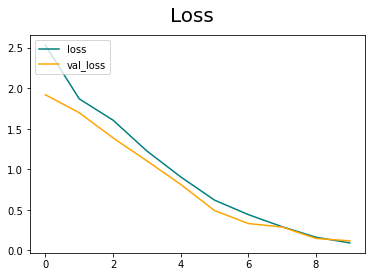

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


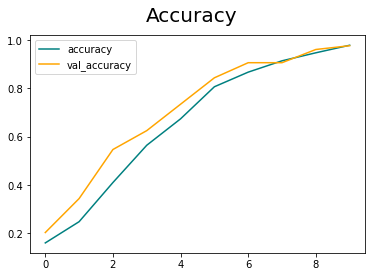

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [39]:
#Evaluate

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [41]:
pre = Precision()
re = Recall()
acc = tf.keras.metrics.CategoricalAccuracy()



In [42]:
print(test.as_numpy_iterator())

In [43]:
#TEST

In [44]:
!ls

 chair_2			     model_new.pkl
'image classifier.pkl'		     model.png
 image_classifier.pkl		     models
'manrega data'			    'Testing images'
'manrega logs'			     training_chair
 model_chair.pkl		     training_chair_logs
 model_new_imageclassifier0524.pkl


In [45]:
img = cv2.imread('/content/drive/MyDrive/METADATA_22/ML/image_classification/Testing images/pondTest.jpg')


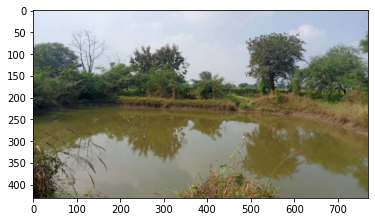

In [46]:
img = cv2.imread('/content/drive/MyDrive/METADATA_22/ML/image_classification/Testing images/pondTest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

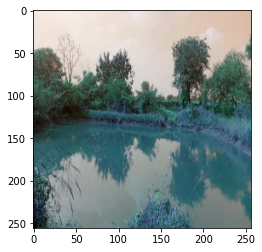

In [47]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 165ms/step


In [49]:
ans=yhat.argmax()
ans

4

In [50]:
if ans==0: 
    print(f'building')
elif ans==1:
    print(f'canal')
elif ans==2:
    print(f'dam')    
elif ans==3:
    print(f'field')  
elif ans==4:
    print(f'pond')  
elif ans==5:
    print(f'road')  
elif ans==6:
    print(f'shelter')  


pond


In [51]:
########################################################################################################

Tested the model successfully!!


Making pickle file for deploying.

In [57]:
import pickle
pickle.dump(model, open('model_new_imageclassifier0925.pkl', 'wb'))

Dumped the model . Now veifying the pickle file.

In [68]:
img = cv2.imread('/content/drive/MyDrive/METADATA_22/ML/image_classification/Testing images/pondTest.jpg')

In [54]:
# import cv2
# img = cv2.imread('https://storage.googleapis.com/mnrega-bucket/image_picker955727770338539800.jpg-d0edf20da5147074.jpg')

In [55]:
print(img)

None


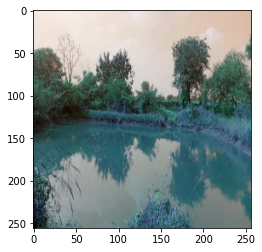

In [69]:
import tensorflow as tf
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [77]:
pickled_model = pickle.load(open('model_new_imageclassifier0925.pkl', 'rb'))
ans1=pickled_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 118ms/step


In [78]:
ans1.argmax()

4